# Chapter 10 Exercises

1. _(TensorFlow Playground exploration)_<br>
<br>
Done.<br>
<br>
1. _Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B)._<br>

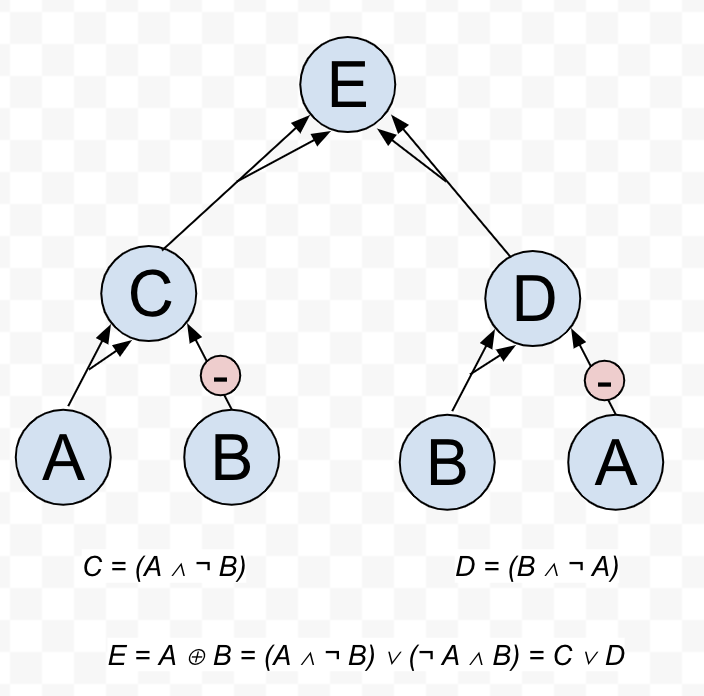

3. _Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?_<br>
<br>
Perceptrons do not output a class probability, or use any regularization by default, so their models typically do not generalize as well.<br>
Instead of using a step function on the linear combination of the inputs, use the logistic function.
<br><br>
1. _Why was the sigmoid activation function a key ingredient in training the first MLPs?_<br>
<br>
The sigmoid function, or logistic function, is differentiable at all non-zero values, so it allows for gradient descent during backpropagation.
<br><br>
1. _Name three popular activation functions. Can you draw them?_<br>

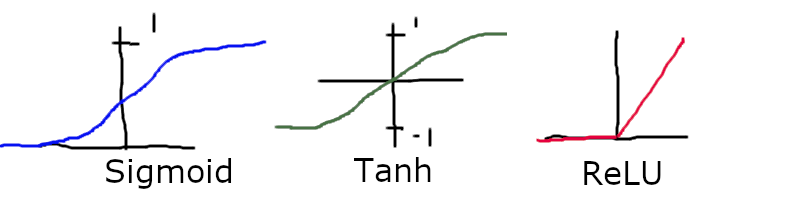

6. _Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function._
    * _What is the shape of the input matrix X?_ (m, 10)
    * _What are the shapes of the hidden layer’s weight matrix Wh and bias vector bh?_ (10, 50), (1, 50)
    * _What are the shapes of the output layer’s weight matrix Wo and bias vector bo?_ (50, 3), (1, 3)
    * _What is the shape of the network’s output matrix Y?_ (m, 3)
    * _Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo, and bo._<br>
    Y = max(0, max(0, X * Wh + bh) * Wo + bo)
<br>
<br><br>
1. _How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about for getting your network to predict housing prices, as in Chapter 2?_<br>
<br>
 * spam: 1, sigmoid<br>
 * MNIST (digit classification) 10, softmax<br>
 * prices: 1, none or ReLU
<br><br>
1. _What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?_<br>
<br>
Backpropagation is the step after forward propagation to determine the contributions from the layers of the network to the loss error.
Reverse-mode autodiff is the processes of automatically determining the gradients, while backproagation adds gradient descent, using those gradients, to optimize losses by tweaking parameters.
<br><br>
1. _Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?_<br>
<br>
 * number of hidden layers, neurons in hidden layers, activation functions, loss function<br>
 * reduce the layers and/or neurons in the hidden layers
<br><br>
1. _Train a deep MLP on the MNIST dataset (you can load it using tf.keras.datasets.mnist.load_data(). See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard._

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

2022-08-28 18:27:30.273441: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
history = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6210 - accuracy: 0.8388 - val_loss: 0.2619 - val_accuracy: 0.9328
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2971 - accuracy: 0.9148 - val_loss: 0.2148 - val_accuracy: 0.9384
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2439 - accuracy: 0.9297 - val_loss: 0.1793 - val_accuracy: 0.9530
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2083 - accuracy: 0.9401 - val_loss: 0.1575 - val_accuracy: 0.9564
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1810 - accuracy: 0.9481 - val_loss: 0.1392 - val_accuracy: 0.9642
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1602 - accuracy: 0.9540 - val_loss: 0.1297 - val_accuracy: 0.9660
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1426 - accuracy: 0.9587 - val_loss: 0.1168 - val_accuracy:

In [5]:
learning_rate = 1e-5
learning_rates = []
losses = []
for i in range(0, 500):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                  metrics=["accuracy"])
    print(str(i+1) + " /500")
    history = model.fit(X_train, y_train, epochs=1, steps_per_epoch=100,
                     validation_data=(X_valid, y_valid))
    learning_rates.append(learning_rate)
    losses.append(history.history["loss"])
    learning_rate *= (10/1e-5) ** (1/500)


1 /500
100/100 [==============================] - 1s 12ms/step - loss: 2.3634 - accuracy: 0.1256 - val_loss: 2.3687 - val_accuracy: 0.1288
2 /500
100/100 [==============================] - 1s 13ms/step - loss: 2.4058 - accuracy: 0.0807 - val_loss: 2.4064 - val_accuracy: 0.0838
3 /500
100/100 [==============================] - 1s 13ms/step - loss: 2.3779 - accuracy: 0.1090 - val_loss: 2.3673 - val_accuracy: 0.1162
4 /500
100/100 [==============================] - 1s 13ms/step - loss: 2.3959 - accuracy: 0.0987 - val_loss: 2.3925 - val_accuracy: 0.0994
5 /500
100/100 [==============================] - 1s 13ms/step - loss: 2.3924 - accuracy: 0.0825 - val_loss: 2.3924 - val_accuracy: 0.0896
6 /500
100/100 [==============================] - 1s 12ms/step - loss: 2.3523 - accuracy: 0.0975 - val_loss: 2.3597 - val_accuracy: 0.0930
7 /500
100/100 [==============================] - 1s 12ms/step - loss: 2.3602 - accuracy: 0.1081 - val_loss: 2.3598 - val_accuracy: 0.1112
8 /500
100/100 [===========

100/100 [==============================] - 2s 14ms/step - loss: 2.3239 - accuracy: 0.1239 - val_loss: 2.3145 - val_accuracy: 0.1324
118 /500
100/100 [==============================] - 2s 15ms/step - loss: 2.3057 - accuracy: 0.1235 - val_loss: 2.2896 - val_accuracy: 0.1270
119 /500
100/100 [==============================] - 2s 15ms/step - loss: 2.3747 - accuracy: 0.0496 - val_loss: 2.3695 - val_accuracy: 0.0444
120 /500
100/100 [==============================] - 2s 15ms/step - loss: 2.3919 - accuracy: 0.0660 - val_loss: 2.3728 - val_accuracy: 0.0826
121 /500
100/100 [==============================] - 2s 15ms/step - loss: 2.2839 - accuracy: 0.1605 - val_loss: 2.2669 - val_accuracy: 0.1790
122 /500
100/100 [==============================] - 2s 16ms/step - loss: 2.3232 - accuracy: 0.1311 - val_loss: 2.2965 - val_accuracy: 0.1498
123 /500
100/100 [==============================] - 2s 16ms/step - loss: 2.2994 - accuracy: 0.1187 - val_loss: 2.2862 - val_accuracy: 0.1278
124 /500
100/100 [====

100/100 [==============================] - 2s 15ms/step - loss: 2.0913 - accuracy: 0.3290 - val_loss: 1.8458 - val_accuracy: 0.5778
234 /500
100/100 [==============================] - 2s 17ms/step - loss: 2.1139 - accuracy: 0.3511 - val_loss: 1.8757 - val_accuracy: 0.5962
235 /500
100/100 [==============================] - 2s 16ms/step - loss: 2.1053 - accuracy: 0.3359 - val_loss: 1.9005 - val_accuracy: 0.5446
236 /500
100/100 [==============================] - 2s 16ms/step - loss: 2.0787 - accuracy: 0.3508 - val_loss: 1.7883 - val_accuracy: 0.6012
237 /500
100/100 [==============================] - 2s 15ms/step - loss: 2.1107 - accuracy: 0.3277 - val_loss: 1.8536 - val_accuracy: 0.6070
238 /500
100/100 [==============================] - 2s 16ms/step - loss: 2.1500 - accuracy: 0.3215 - val_loss: 1.9500 - val_accuracy: 0.5432
239 /500
100/100 [==============================] - 2s 17ms/step - loss: 2.1302 - accuracy: 0.3376 - val_loss: 1.8676 - val_accuracy: 0.6344
240 /500
100/100 [====

100/100 [==============================] - 2s 16ms/step - loss: 0.7172 - accuracy: 0.7999 - val_loss: 0.2708 - val_accuracy: 0.9302
350 /500
100/100 [==============================] - 2s 16ms/step - loss: 0.7028 - accuracy: 0.8049 - val_loss: 0.2771 - val_accuracy: 0.9236
351 /500
100/100 [==============================] - 2s 15ms/step - loss: 0.6573 - accuracy: 0.8191 - val_loss: 0.2568 - val_accuracy: 0.9328
352 /500
100/100 [==============================] - 2s 16ms/step - loss: 0.6947 - accuracy: 0.8081 - val_loss: 0.2650 - val_accuracy: 0.9294
353 /500
100/100 [==============================] - 2s 15ms/step - loss: 0.6945 - accuracy: 0.8047 - val_loss: 0.2604 - val_accuracy: 0.9340
354 /500
100/100 [==============================] - 2s 15ms/step - loss: 0.6767 - accuracy: 0.8113 - val_loss: 0.2589 - val_accuracy: 0.9328
355 /500
100/100 [==============================] - 2s 14ms/step - loss: 0.6707 - accuracy: 0.8121 - val_loss: 0.2546 - val_accuracy: 0.9330
356 /500
100/100 [====

100/100 [==============================] - 2s 15ms/step - loss: 16683323.0000 - accuracy: 0.1072 - val_loss: 2.3032 - val_accuracy: 0.1060
464 /500
100/100 [==============================] - 2s 17ms/step - loss: 16480362037248.0000 - accuracy: 0.1055 - val_loss: 2.3032 - val_accuracy: 0.1060
465 /500
100/100 [==============================] - 2s 16ms/step - loss: 8052482295634627395584.0000 - accuracy: 0.1079 - val_loss: 2.3032 - val_accuracy: 0.1060
466 /500
100/100 [==============================] - 2s 17ms/step - loss: 2193078800560870411353456640.0000 - accuracy: 0.1058 - val_loss: 2.3033 - val_accuracy: 0.1060
467 /500
100/100 [==============================] - 2s 17ms/step - loss: inf - accuracy: 0.1055 - val_loss: 2.3033 - val_accuracy: 0.1060
468 /500
100/100 [==============================] - 2s 17ms/step - loss: 8861874075546051242098688.0000 - accuracy: 0.1049 - val_loss: 2.3034 - val_accuracy: 0.1060
469 /500
100/100 [==============================] - 2s 18ms/step - loss: 4

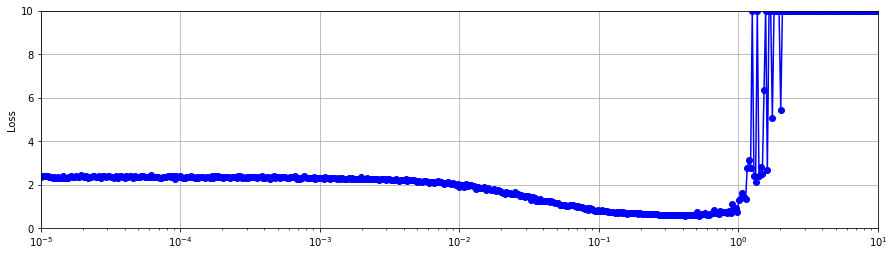

In [11]:
import numpy as np
import matplotlib.pyplot as plt

group_range = range(5, 150, 5)


losses_clamp = []
for lossList in losses:
    #print(lossList)
    loss = lossList[0]
    if np.isnan(loss):
        loss = 10
    losses_clamp.append(min(10,loss))
    
    
plt.figure(figsize=(15, 4))
plt.plot(learning_rates, losses_clamp, "bo-")
plt.ylabel("Loss")
plt.axis([1e-5, 10, 0, 10])
plt.xscale("log")
plt.grid()
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=.1),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                 validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9209 - val_loss: 0.1074 - val_accuracy: 0.9694
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1100 - accuracy: 0.9668 - val_loss: 0.0853 - val_accuracy: 0.9754
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0743 - accuracy: 0.9773 - val_loss: 0.0683 - val_accuracy: 0.9798
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0679 - val_accuracy: 0.9812
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0706 - val_accuracy: 0.9808
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.1022 - val_accuracy: 0.9716
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0681 - val_accuracy:

In [13]:
import keras_tuner as kt
from pathlib import Path

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=5, default=2)
    n_neurons = hp.Int("n_neurons", min_value=100, max_value=400, default=300)
    learning_rate = 1e-1 #hp.Float("learning_rate", min_value=1e-4, max_value=1e-1, default=
                        #     sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
                       
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model
                       
hyperband_tuner = kt.Hyperband(
    build_model, objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_mnist", project_name="hyperband")
                       
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)

In [14]:
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb, checkpoint_cb])

hyperband_tuner.get_best_hyperparameters() 

Trial 60 Complete [00h 01m 21s]
val_accuracy: 0.9843999743461609

Best val_accuracy So Far: 0.9843999743461609
Total elapsed time: 00h 27m 53s
INFO:tensorflow:Oracle triggered exit


In [16]:
print(hyperband_tuner.get_best_hyperparameters(1)[0].values )

{'n_hidden': 2, 'n_neurons': 394, 'optimizer': 'sgd', 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}
